<a href="https://colab.research.google.com/github/vitorquintella/personal-ml-study/blob/main/Caderno_Rede_Neural_Tradicional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo
Baseado na aula 18/03/2022 do Let's Code

# Introdução



? O uso de multiplas camadas escondidas permite que cada camada agrega informações e combinações de informações. Caso exista relação das combinação das combinações poderá ser capturado?

<img src='https://d2l.ai/_images/mlp.svg'>



além disso existe o softmax



[Statquest, redes neurais](https://www.youtube.com/watch?v=CqOfi41LfDw&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1)


Pra brincar:
[playground.tensorflow](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.07252&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

[Para uso de gpu](https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=qB3bdLe8jkAa)


O que costumamos a customizar (Topologia da rede):

1. Quantidade de neurôrios:
  - Para trabalharmos problemas mais complexos
1. Quantidade de camadas
  - Para termos diferentes níveis de aprendizado
1. Quantidade de entradas e saidas
1. Função de ativação
1. Inicialização dos pesos 

# Conceitos fique esperto: 

**Backpropagation:**
A atualização do peso se dá para da última  camada até a primeira.
Isso ocorre devido ao calculo do gradiente. Que pela regra da cadeia é feita naturalmente da função global para a função anterior.

**vanish gradient/exploding gradient:** 
Muitas camadas tendem a zerar o gradiente. Levando a uma atualização mínima das camadas Pequenas mudanças.

Grande taxa de atualização faz com que não se tenha convergência.


**relu - função de ativação:**
É uma função que facilita muito o processo de otimização. é eficiente.
Interessante, pois a derivada é simples, constantes ou 0 ou 1.

**Softmax:**
Não resulta em probabilidade, resulta em um equiparavel. 


# Conceitos básicos
Neurônio (perceptron): 
* Estrutura com pesos para cada entrada
* Objetivo de encontrar os melhores pesos para classificar um problema
* Funciona apenas para problemas linearmente separáveis

Camadas:
* Múltiplos neurônios formam uma camada
* Possibilidade de resolver problemas que não são linearmente separáveis

Sequencial / não sequencial:
* Modelos sequenciais uma camada conecta somente na próxima.
* Em modelos não sequenciais é possível criar comunicações entre camadas distindas.

Função de ativação:
* Deve ser não linear
* Quebra a linearidade
* Aumenta a complexidade
* Se fosse linear, o conjunto linear seria

# Para se aprofundar:
[pytorch - notebook do adriano](https://www.kaggle.com/code/coldfir3/redes-neurais-aula-1-let-s-code?scriptVersionId=90985306)

# Introdução a Redes Neurais

* Algoritmo de aprendizagem de máquina inspirado no neurônio biológico, possuindo uma estrutura básica chamada neurônio

1. Neurônio biológico

![Title](imgs/neuronio.jpg)

2. Neurônio de uma rede neural (perceptron)

* Estrutura com pesos para cada entrada
* Objetivo de encontrar os melhores pesos para classificar um problema
* Funciona apenas para problemas linearmente separáveis

<img src=https://miro.medium.com/max/1400/1*vn7VIPb_JpwEX7PAftjYsw.png width=500>

3. Para formar uma rede neural propriamente dita, tem-se um conjunto de neurônios
* Múltiplos neurônios formam uma camada
* Possibilidade de resolver problemas que não são linearmente separáveis
<img src=https://miro.medium.com/max/1166/1*WNxN2ArLaGt0-Rm3tzWw1g.jpeg width=500> 

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob # Uma boa bilioteca de manipulação entre arquivos é "glob"
from sklearn.model_selection import train_test_split
import cv2 # Ubiblioteca para manipulação de imagens
import tensorflow
import matplotlib.pyplot as plot
from random import randint
from sklearn.preprocessing import OneHotEncoder

Base de dados [Intel Image Classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

* 6 classes (buildings, forest, glacier, mountain, sea, street)
* Imagems 150x150
* 14k imagens de treinamento
* 3k imagens para teste

In [ ]:
!pip install -Uqqq gdown
# Para baixar direto do link publico do arquivo: usar parte final do link
!gdown 1XNSk1lEudBy8vYUNMx7De455UB5AwG-Y

# Dica, nunca executar dataser grande direto do drive, pois a leitura sera em stream.
# O certo é baixar para a memória do drive por inteiro e depois rodar nele.
import shutil
shutil.unpack_archive('/content/drive/MyDrive/deep_learning/copia_de_dataset.zip','datas')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Downloading...
From: https://drive.google.com/uc?id=1XNSk1lEudBy8vYUNMx7De455UB5AwG-Y
To: /content/dataset.zip
100% 374M/374M [00:05<00:00, 64.0MB/s]


In [ ]:
# Uma boa bilioteca para leitura de dados e imagens é "glob"
# Acessar uma pasta e trazer recursivamente tudo que obedece ao padrão *.jpg

X = []
y = []

for files in glob.glob("/content/datas/dataset/seg_train/**/*.jpg", recursive=True):
    # print(files) #e.g. vizualizar cada arquivo.
    image = cv2.imread(files)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Pequeno ajuste de cores.
    image = cv2.resize(image,(150,150)) # Garantir que a entrada tem o mesmo tamanho
    X.append(image) # É a imagem
    y.append(files.split('/')[5]) # selecionando a pasta com a categoria

# Convertendo em array para manipular matematicamente
# X terá a quantidade de imagens, 150 colunas, 150 linhas, 3 cores
X = np.array(X)
y = np.array(y)
X.shape

(14034, 150, 150, 3)

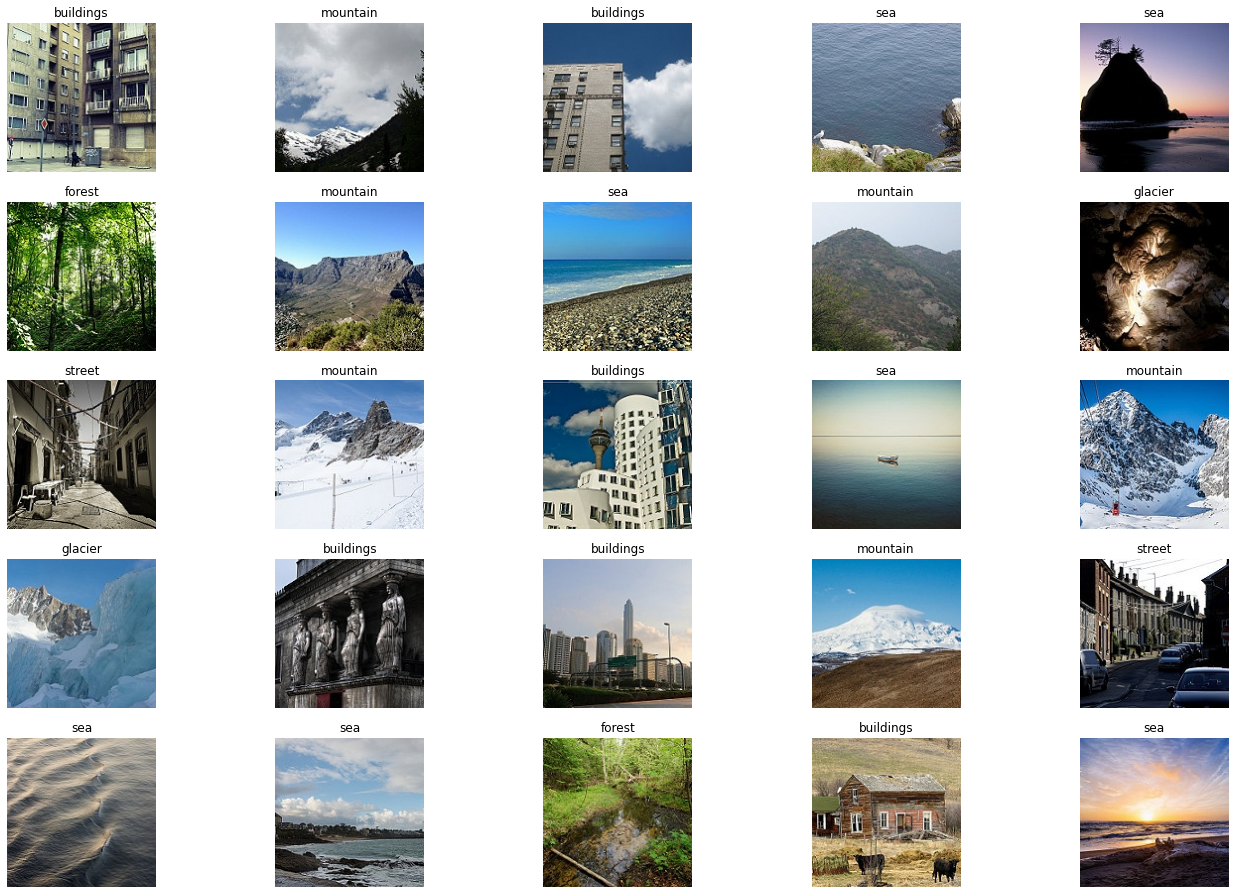

In [ ]:
# Vizualizando algumas imagens aleatórias
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(X))
        ax[i,j].imshow(X[rnd_number])
        ax[i,j].set_title(y[rnd_number])
        ax[i,j].axis('off')

# Particionamento dos dados

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
     X, y, stratify=y, test_size=0.33, random_state=42)

### Pré-processamento

In [ ]:
# Ajustando o y
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = hot.transform(y_val.reshape(-1, 1)).toarray()

# Ajustando o X entre 0 e 1
m = np.max(X_train)
X_train = X_train/m
X_val = X_val/m

In [ ]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
0. Modelo sequencial / não sequencial 
1. Definir quantas camadas são necessárias para o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [ ]:
n_classes = 6

# Criando um modelo sequencial
rede_simples = Sequential()
# o add é criado para adicionar elementos da sequencia da rede
# Flatten é usado para rransformar matriz em array, n pixels
rede_simples.add(Flatten()) 
# Primeiro input eh o numero de neuronios, vmaos usar 25
# As dimensões do input é o numero de pixels
n_pixels =  X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
rede_simples.add(Dense(32,  input_dim = n_pixels))
rede_simples.add(Activation('relu')) # Função de ativacao 
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
# A camada de saida deve ter, naturalmente, o numero de classes que esperamos
rede_simples.add(Dense(n_classes))
# Para muticlasses usamos o softmax
rede_simples.add(Activation('softmax'))

### 5. Definir otimizadores

<img src='https://ml-cheatsheet.readthedocs.io/en/latest/_images/optimizers.gif' width=400>

In [ ]:
# Categorical_crossentropy é uma perda adaptada para categoricas
# Podemos utilizar métricas para visualizar informações mais comums em ML
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [ ]:
# #### 6. Treinamento
# historico = rede_simples.fit(X_train, 
#                              y_train, 
#                              epochs = 15,
#                              batch_size=64,
#                              verbose = 1,
#                              validation_data = (X_val, y_val))

# 7. Avaliação do modelo


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# A saida do pred simples é a saida dos ultimos neoronios.
# Escolhemos a classe com maior resultado
pred_simples = rede_simples.predict(X_val)
print(accuracy_score(y_val.argmax(1), pred_simples.argmax(1)))
print(confusion_matrix(y_val.argmax(1), pred_simples.argmax(1)))

0.17443868739205526
[[  0  58  23   0 381 261]
 [  1  49  58   0 328 314]
 [  0  28  13   0 584 168]
 [  0  63  26   0 493 247]
 [  0  49  10   0 530 162]
 [  2  65  20   1 482 216]]


In [ ]:
# Visualizando resultados
def plot_overfitting(historico):
  loss = historico.history['loss']
  val_loss = historico.history['val_loss']
  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [ ]:
# plot_overfitting(historico)

NameError: ignored

#8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento (não é tecnicamente uma regularização)
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

  * [Artigo para DropOut](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)
  * [Artigo2 para DropOut](https://arxiv.org/pdf/1207.0580.pdf)




In [ ]:
n_classes = 6

# Criando um modelo sequencial
rede_simples = Sequential()
rede_simples.add(Flatten()) 
n_pixels =  X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
rede_simples.add(Dense(128,  input_dim = n_pixels))
# Função de ativacao 
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(64))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(32))
rede_simples.add(Dropout(0.2))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(n_classes))
rede_simples.add(Activation('softmax'))

rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam', 
                     metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 30, verbose = 1, 
                  mode = 'auto')

In [ ]:
historico = rede_simples.fit(X_train, 
                            y_train, 
                            epochs = 150, 
                            verbose = 1,
                            validation_data = (X_val, y_val),
                            callbacks = [es])

Epoch 1/150
294/294 [==============================] - 15s 47ms/step - loss: 2.1896 - accuracy: 0.2289 - val_loss: 1.7870 - val_accuracy: 0.1816
Epoch 2/150
294/294 [==============================] - 11s 39ms/step - loss: 1.7677 - accuracy: 0.1872 - val_loss: 1.7321 - val_accuracy: 0.2558
Epoch 3/150
294/294 [==============================] - 11s 38ms/step - loss: 1.7428 - accuracy: 0.2332 - val_loss: 1.7089 - val_accuracy: 0.2608
Epoch 4/150
294/294 [==============================] - 11s 38ms/step - loss: 1.6977 - accuracy: 0.2685 - val_loss: 1.6290 - val_accuracy: 0.3260
Epoch 5/150
294/294 [==============================] - 11s 38ms/step - loss: 1.7136 - accuracy: 0.2503 - val_loss: 1.7680 - val_accuracy: 0.2066
Epoch 6/150
294/294 [==============================] - 11s 38ms/step - loss: 1.7004 - accuracy: 0.2620 - val_loss: 1.5841 - val_accuracy: 0.3435
Epoch 7/150
294/294 [==============================] - 11s 38ms/step - loss: 1.6490 - accuracy: 0.2939 - val_loss: 1.5808 - val_ac

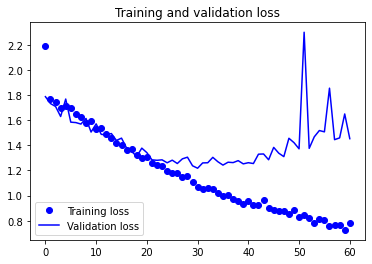

In [ ]:
plot_overfitting(historico)